In [144]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

from datetime import datetime

In [2]:
df = pd.read_csv('tesla_all_data_original_dates.csv', index_col='Date')
df.shape

(2719, 8)

In [3]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.2168,21.679984


In [4]:
data_set = df.loc[:, 'Adj Close'].values

In [5]:
split=round(len(data_set)*.90)

In [6]:
training_set=data_set[0:split]
test_set=data_set[split:]

In [7]:
training_set.shape

(2447,)

In [8]:
training_set = training_set.reshape(-1, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled.shape

(2447, 1)

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape,y_train.shape

((2387, 60, 1), (2387,))

In [ ]:
# # Define the size of the validation set
# val_size = int(len(X_train)*0.02)

# # Split the data into training and validation sets
# X_val = X_train[-val_size:]
# y_val = y_train[-val_size:]
# X_train = X_train[:-val_size]
# y_train = y_train[:-val_size]

In [159]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
75/75 [==============================] - 24s 178ms/step - loss: 0.0055
Epoch 2/100
75/75 [==============================] - 14s 188ms/step - loss: 0.0022
Epoch 3/100
75/75 [==============================] - 14s 187ms/step - loss: 0.0021
Epoch 4/100
75/75 [==============================] - 13s 179ms/step - loss: 0.0015
Epoch 5/100
75/75 [==============================] - 14s 186ms/step - loss: 0.0015
Epoch 6/100
75/75 [==============================] - 14s 180ms/step - loss: 0.0014
Epoch 7/100
75/75 [==============================] - 14s 187ms/step - loss: 0.0011
Epoch 8/100
75/75 [==============================] - 13s 180ms/step - loss: 0.0013
Epoch 9/100
75/75 [==============================] - 14s 186ms/step - loss: 9.8544e-04
Epoch 10/100
75/75 [==============================] - 14s 183ms/step - loss: 0.0010
Epoch 11/100
75/75 [==============================] - 14s 192ms/step - loss: 0.0011
Epoch 12/100
75/75 [==============================] - 14s 183ms/step - loss: 9.90

75/75 [==============================] - 14s 180ms/step - loss: 4.6107e-04
Epoch 96/100
75/75 [==============================] - 10s 137ms/step - loss: 4.3025e-04
Epoch 97/100
75/75 [==============================] - 9s 117ms/step - loss: 3.6297e-04
Epoch 98/100
75/75 [==============================] - 9s 114ms/step - loss: 4.4402e-04
Epoch 99/100
75/75 [==============================] - 9s 113ms/step - loss: 4.6208e-04
Epoch 100/100
75/75 [==============================] - 10s 138ms/step - loss: 3.9698e-04


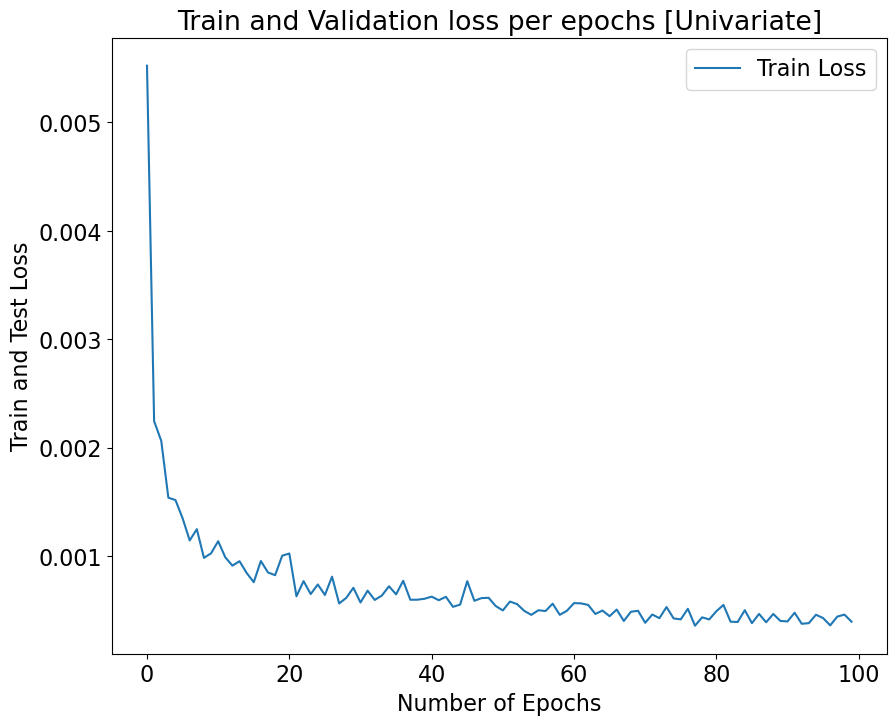

In [160]:
# plot history
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['loss'], label='Validation Loss')
#plt.plot(history.history['val_loss'], label='Validaton Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Validation loss per epochs [Univariate]')
plt.legend()
plt.show()

In [16]:
# list_of_val_loss=history.history['val_loss']
# min_val_loss=min(history.history['val_loss'])
# index_min_val_loss=list_of_val_loss.index(min_val_loss)
# print(index_min_val_loss)

In [162]:
list_of_loss=history.history['loss']
min_loss=min(history.history['loss'])
index_min_loss=list_of_loss.index(min_loss)
print(index_min_loss)

77


In [163]:
train_predict = regressor.predict(X_train)

75/75 [==============================] - 6s 58ms/step


In [164]:
y_train[-1],train_predict[-1]

(0.38311041511492916, array([0.43073148], dtype=float32))

In [165]:
#train_predict = sc.inverse_transform(train_predict)

In [166]:
train_predict[-1]

array([0.43073148], dtype=float32)

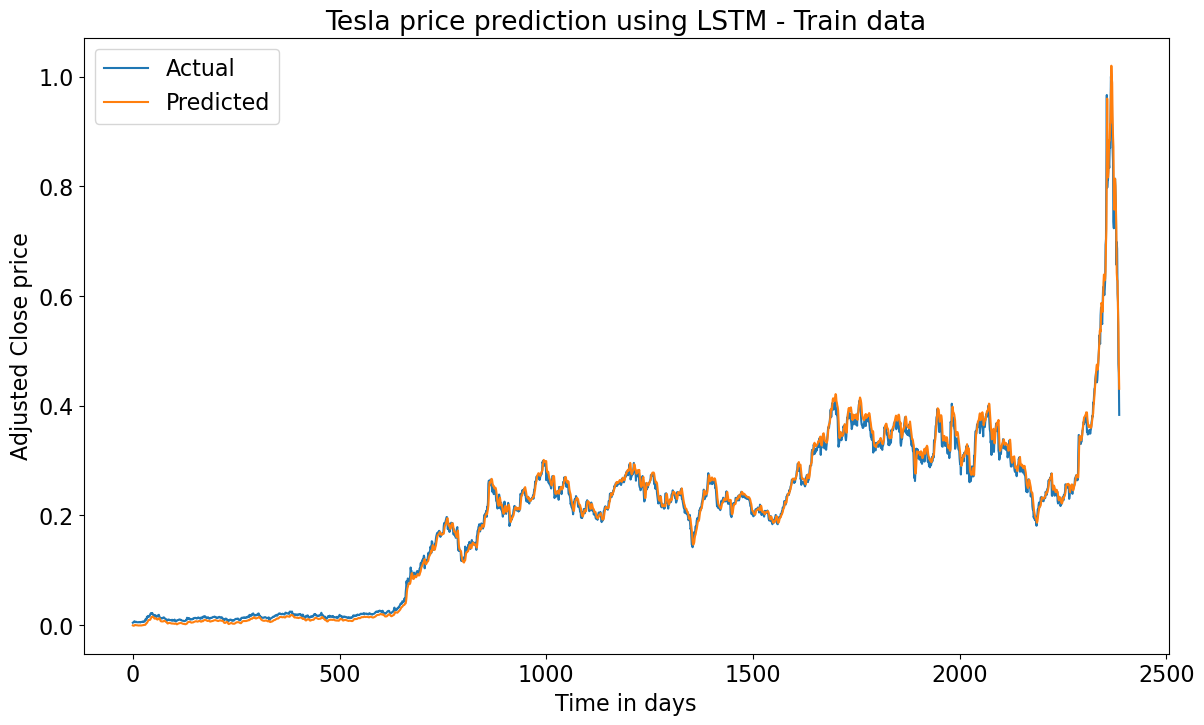

In [167]:
# Plot Train Data
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(y_train, label = 'Actual')
plt.plot(train_predict, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('Adjusted Close price')
plt.title('Tesla price prediction using LSTM - Train data')
plt.legend()
plt.show()

## Model Evaluation on Test Data

In [168]:
len(data_set)

2719

In [169]:
inputs = data_set[len(data_set) - len(test_set) - 60:]

In [170]:
inputs.shape

(332,)

In [171]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [172]:
X_test = []
y_test=[]
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test,y_test = np.array(X_test),np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [173]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 [==============================] - 1s 73ms/step


In [174]:
predicted_stock_price.shape

(272, 1)

In [175]:
y_test.shape

(272,)

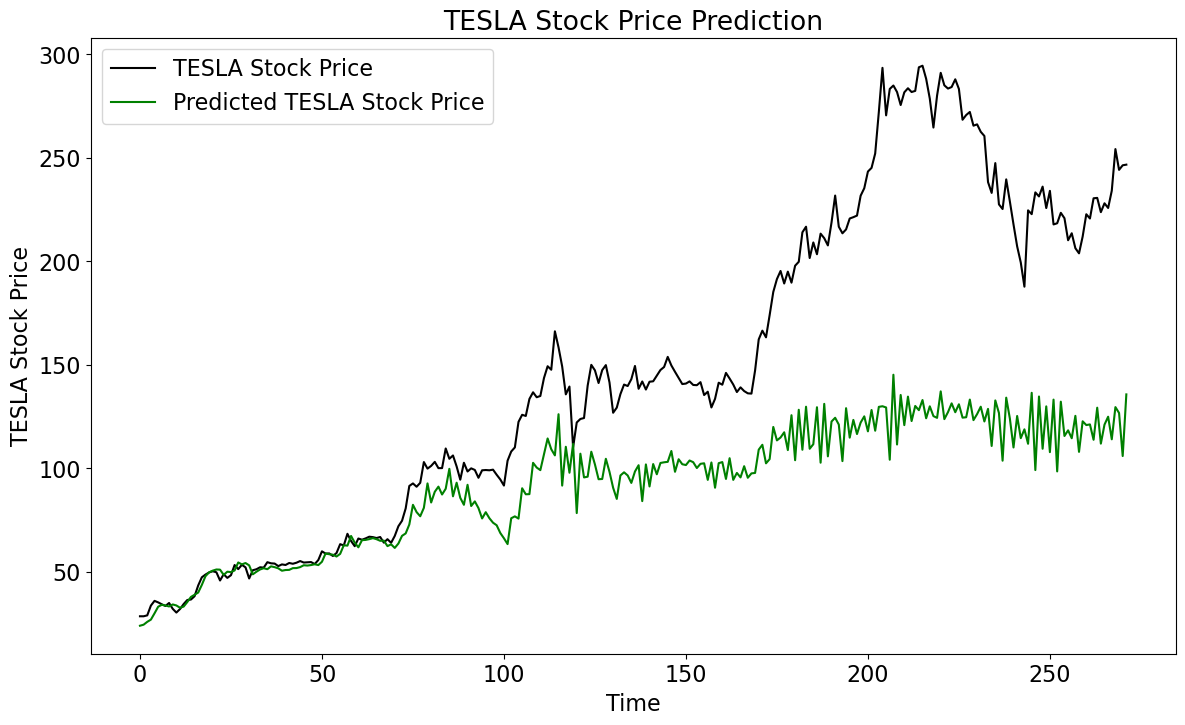

In [176]:
plt.plot(test_set, color = 'black', label = 'TESLA Stock Price')
plt.plot(predicted_stock_price.flatten(), color = 'green', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [177]:
# calculate root mean squared error
# RMSE between actual and predicted test values
import math
from sklearn.metrics import mean_squared_error

testScore = math.sqrt(mean_squared_error(test_set[:], predicted_stock_price[:,0]))
print('Root Mean Square Error: %.2f RMSE' % (testScore))

Root Mean Square Error: 75.48 RMSE


In [178]:
# R-squared
r2 = r2_score(test_set[:], predicted_stock_price[:,0])
print('R-squared:', r2)

R-squared: 0.06869699739690738


In [179]:
#Mean Absolute Error (MAE)
mae_test_score = mean_absolute_error(test_set[:], predicted_stock_price[:,0])

print('Test MAE: ',mae_test_score)

Test MAE:  55.423185530830835


In [180]:
train_residuals=y_train-train_predict.flatten()

In [181]:
test_residuals=test_set-predicted_stock_price.flatten()

In [182]:
test_residuals.shape

(272,)

In [183]:
predict = np.concatenate((y_train, test_set), axis=0)
residuals=np.concatenate((train_residuals, test_residuals), axis=0)

In [184]:
predict.shape, residuals.shape

((2659,), (2659,))

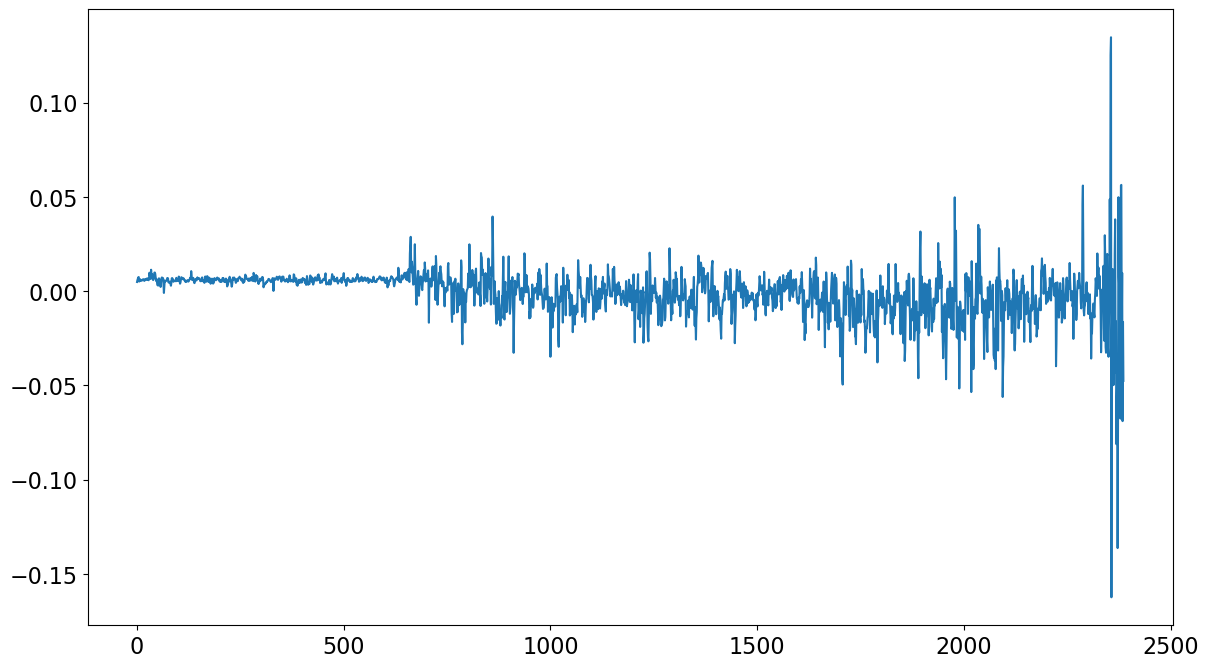

In [185]:
plt.plot(train_residuals)

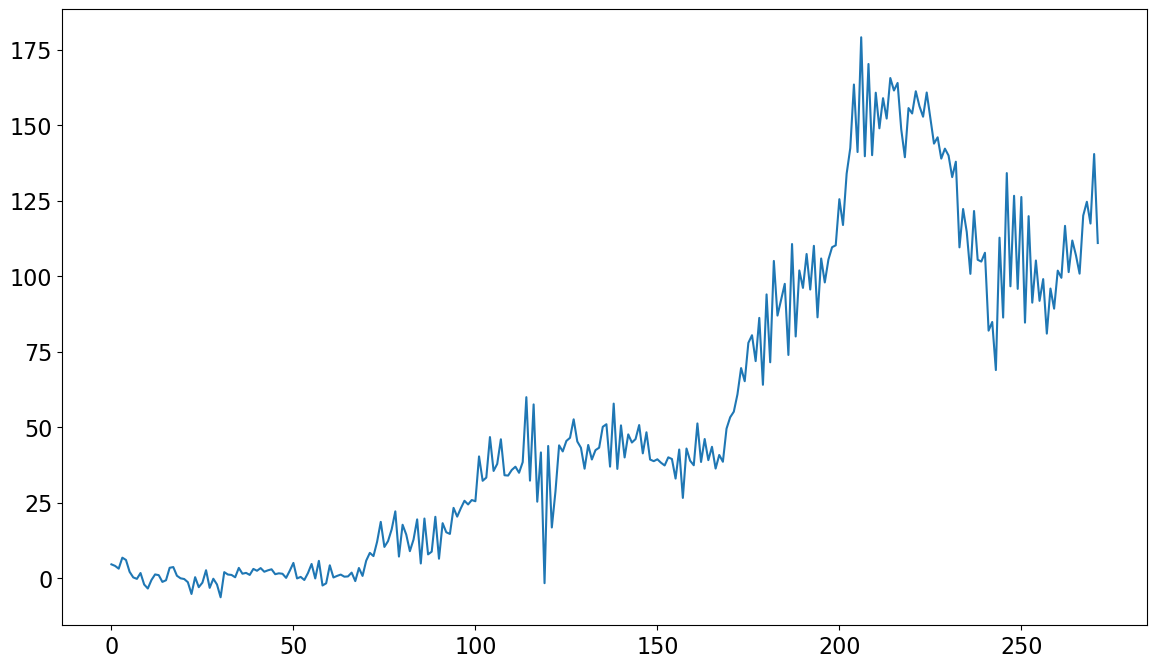

In [186]:
plt.plot(test_residuals)

## Testing the model on new data(out of scope of the project)

In [187]:
from pandas_datareader import data
import yfinance as yfin
yfin.pdr_override()

In [188]:
end_date = datetime.today().date()#.strftime('%Y-%m-%d')

In [189]:
print(end_date)

2023-04-26


In [190]:
start_date = end_date - pd.Timedelta(days=100)
print(start_date)

2023-01-16


In [191]:
df = data.get_data_yahoo("TSLA", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [192]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123352300
2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300


In [193]:
inputs=df['Adj Close'].values

In [194]:
len(df)

69

In [195]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [196]:
len(inputs)

69

In [197]:
len(df)

69

In [198]:
X_test = []

In [199]:
len(X_test)

0

In [200]:
X_test = []
for i in range(60, len(inputs)+1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 70ms/step


In [201]:
newest_price_predicted=predicted_stock_price[-1]
newest_price_predicted

array([109.52987], dtype=float32)

In [202]:
new_df=df['Close'][-len(predicted_stock_price):]

In [203]:
new_df=df.loc[:, ['Adj Close']].iloc[60:]

In [204]:
new_df['predicted_stock_price']=predicted_stock_price[:-1]

In [205]:
new_df

,Adj Close,predicted_stock_price
Date,,
2023-04-13,185.899994,106.320229
2023-04-14,185.000000,121.342361
2023-04-17,187.039993,106.745071
2023-04-18,184.309998,117.987991
2023-04-19,180.589996,108.548401
2023-04-20,162.990005,112.884720
2023-04-21,165.080002,97.868790
2023-04-24,162.550003,118.487419
2023-04-25,160.669998,102.180527


In [206]:
end_date.strftime('%Y-%m-%d')

'2023-04-26'

In [207]:
new_df.loc[end_date.strftime('%Y-%m-%d')] = [165.65, newest_price]

NameError: name 'newest_price' is not defined

In [ ]:
new_df

In [ ]:
len(df['Adj Close'].values)

In [ ]:
plt.plot(new_df['Adj Close'],label = 'Real Price')
plt.plot(new_df['predicted_stock_price'],label = 'Predicted Price')
plt.legend()
plt.show()